<a href="https://colab.research.google.com/github/Basma2423/IMDb-Reviews-Sentimental-Analysis/blob/main/Sentimental_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this assignment, you will practice how to use algorithms explained in the
course to solve a classification problem.
Course project
Due To 11/5/2024

• Choose an image or NLP or speech dataset from your choice

• Prepare data preprocessing & cleaning techniques of your choice
according to the nature of your dataset

• Create extract_features function that returns the important features of the
image(you are allowed to use a pretrained feature extraction model
inside the function anything else must be done from scratch)

• Apply all classification algorithms that you learned in this course that
takes the images features from the function extract_features()

• Create predict() function from scratch that takes a test sample and prints
the class of that test sample.

• Create a classification report for each algorithm.

• Compare the result of all algorithms and choose the best algorithm

In [ ]:
import numpy as np
import pandas as pd
import re
import string
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: Error: credential propagation was unsuccessful

In [ ]:
#importing the training data
imdb_data=pd.read_csv('/content/drive/MyDrive/IMDB Dataset.csv')
print(imdb_data.shape)
imdb_data.head(10)

(50000, 2)


,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
5,"Probably my all-time favorite movie, a story o...",positive
6,I sure would like to see a resurrection of a u...,positive
7,"This show was an amazing, fresh & innovative i...",negative
8,Encouraged by the positive comments about this...,negative
9,If you like original gut wrenching laughter yo...,positive


In [ ]:
imdb_data.duplicated().sum()

418

In [ ]:
imdb_data.drop_duplicates(inplace=True)


In [ ]:
imdb_data.duplicated().sum()

0

In [ ]:
# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
def preprocess_text(text):
    text = text.translate(str.maketrans('', '', string.punctuation + string.digits))
    text = text.lower()
    tokens = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [word for word in tokens if word not in stop_words]
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(word) for word in filtered_tokens]
    preprocessed_text = ' '.join(lemmatized_tokens)
    return preprocessed_text

In [ ]:
# Show the first 15 rows of the dataset before we perform any preprocessing on it
print(imdb_data.head(15))

                                               review sentiment
0   One of the other reviewers has mentioned that ...  positive
1   A wonderful little production. <br /><br />The...  positive
2   I thought this was a wonderful way to spend ti...  positive
3   Basically there's a family where a little boy ...  negative
4   Petter Mattei's "Love in the Time of Money" is...  positive
5   Probably my all-time favorite movie, a story o...  positive
6   I sure would like to see a resurrection of a u...  positive
7   This show was an amazing, fresh & innovative i...  negative
8   Encouraged by the positive comments about this...  negative
9   If you like original gut wrenching laughter yo...  positive
10  Phil the Alien is one of those quirky films wh...  negative
11  I saw this movie when I was about 12 when it c...  negative
12  So im not a big fan of Boll's work but then ag...  negative
13  The cast played Shakespeare.<br /><br />Shakes...  negative
14  This a fantastic movie of three pris

In [ ]:
imdb_data['review'] = imdb_data['review'].apply(preprocess_text)

In [ ]:
# Show the first 15 rows of the dataset after preprocessing
print(imdb_data.head(15))

                                               review sentiment
0   one reviewer mentioned watching oz episode you...  positive
1   wonderful little production br br filming tech...  positive
2   thought wonderful way spend time hot summer we...  positive
3   basically there family little boy jake think t...  negative
4   petter matteis love time money visually stunni...  positive
5   probably alltime favorite movie story selfless...  positive
6   sure would like see resurrection dated seahunt...  positive
7   show amazing fresh innovative idea first aired...  negative
8   encouraged positive comment film looking forwa...  negative
9   like original gut wrenching laughter like movi...  positive
10  phil alien one quirky film humour based around...  negative
11  saw movie came recall scariest scene big bird ...  negative
12  im big fan boll work many enjoyed movie postal...  negative
13  cast played shakespearebr br shakespeare lostb...  negative
14  fantastic movie three prisoner becom

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(imdb_data['review'], imdb_data['sentiment'], test_size=0.2, random_state=42)

In [ ]:
vectorizer = TfidfVectorizer()
def extract_features(X_train, X_test = None):
    X_train_tfidf = vectorizer.fit_transform(X_train)
    if X_test is not None:
        X_test_tfidf = vectorizer.transform(X_test)
        return X_train_tfidf, X_test_tfidf
    else:
        return X_train_tfidf


In [ ]:
X_train_tfidf, X_test_tfidf = extract_features(X_train, X_test)

In [ ]:
def predict(model, sample):
    sample_tfidf = vectorizer.transform([sample])
    prediction = model.predict(sample_tfidf)
    print(f'Predicted class: {prediction[0]}')

Naive Bayes Classifier Accuracy: 0.8657


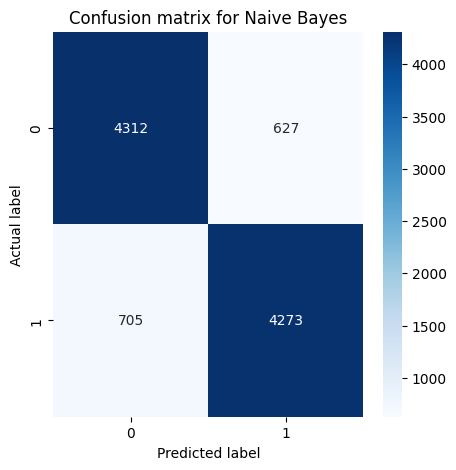

Naive Bayes Classifier:
              precision    recall  f1-score   support

    negative       0.86      0.87      0.87      4939
    positive       0.87      0.86      0.87      4978

    accuracy                           0.87      9917
   macro avg       0.87      0.87      0.87      9917
weighted avg       0.87      0.87      0.87      9917

SVM Classifier Accuracy: 0.8953


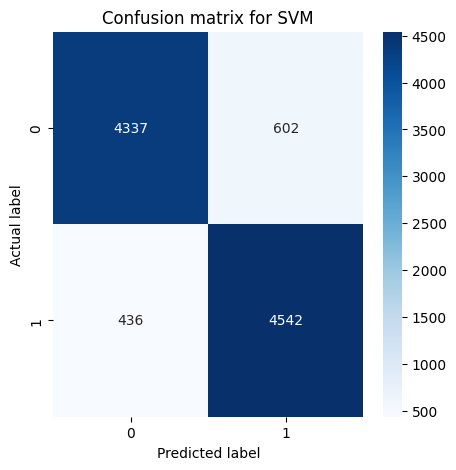

SVM Classifier:
              precision    recall  f1-score   support

    negative       0.91      0.88      0.89      4939
    positive       0.88      0.91      0.90      4978

    accuracy                           0.90      9917
   macro avg       0.90      0.90      0.90      9917
weighted avg       0.90      0.90      0.90      9917

Decision Tree Classifier Accuracy: 0.7081


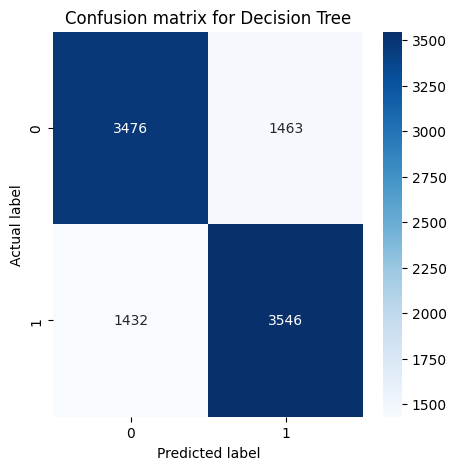

Decision Tree Classifier:
              precision    recall  f1-score   support

    negative       0.71      0.70      0.71      4939
    positive       0.71      0.71      0.71      4978

    accuracy                           0.71      9917
   macro avg       0.71      0.71      0.71      9917
weighted avg       0.71      0.71      0.71      9917

Random Forest Classifier Accuracy: 0.8462


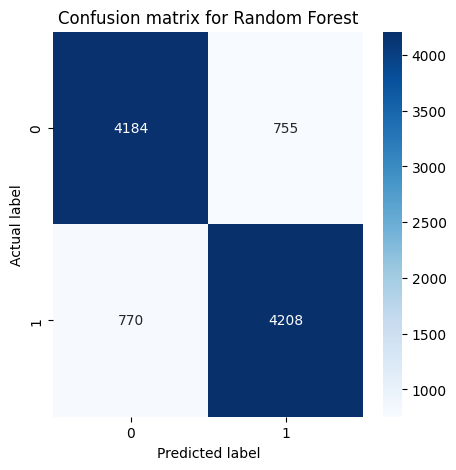

Random Forest Classifier:
              precision    recall  f1-score   support

    negative       0.84      0.85      0.85      4939
    positive       0.85      0.85      0.85      4978

    accuracy                           0.85      9917
   macro avg       0.85      0.85      0.85      9917
weighted avg       0.85      0.85      0.85      9917

Logistic Regression Classifier Accuracy: 0.8895


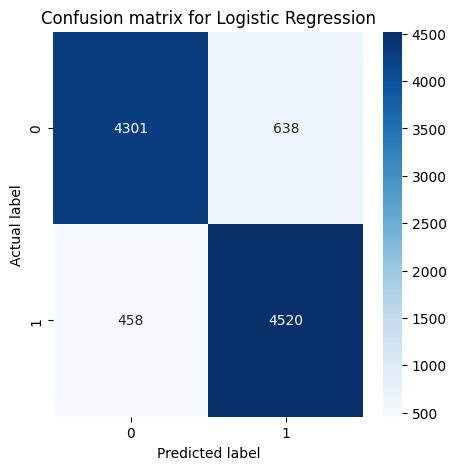

Logistic Regression Classifier:
              precision    recall  f1-score   support

    negative       0.90      0.87      0.89      4939
    positive       0.88      0.91      0.89      4978

    accuracy                           0.89      9917
   macro avg       0.89      0.89      0.89      9917
weighted avg       0.89      0.89      0.89      9917

KNN Classifier Accuracy: 0.7721


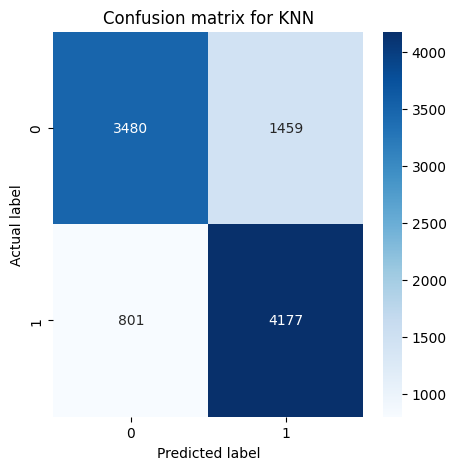

KNN Classifier:
              precision    recall  f1-score   support

    negative       0.81      0.70      0.75      4939
    positive       0.74      0.84      0.79      4978

    accuracy                           0.77      9917
   macro avg       0.78      0.77      0.77      9917
weighted avg       0.78      0.77      0.77      9917

The best classifier is: SVM


In [ ]:
classifiers = {
    "Naive Bayes": MultinomialNB(),
    "SVM": SVC(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest":  RandomForestClassifier(),
    "Logistic Regression": LogisticRegression(),
    "KNN": KNeighborsClassifier()
}

def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(5, 5))
    sns.heatmap(cm, annot=True, fmt="d", cmap='Blues')
    plt.title(f'Confusion matrix for {title}')
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    plt.show()

accuracies = {}

for name, classifier in classifiers.items():
    model = make_pipeline(vectorizer, classifier)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} Classifier Accuracy: {accuracy:.4f}")
    plot_confusion_matrix(y_test, y_pred, name)

    accuracies[name] = accuracy

    print(f"{name} Classifier:")
    print(classification_report(y_test, y_pred))

best_classifier = max(accuracies, key=accuracies.get)
print(f"The best classifier is: {best_classifier}")

In [ ]:
review = input('Enter a review: ')
processed_text = preprocess_text(review)
print('the SVM classifies this review as : ')
predict(classifiers['SVM'], processed_text)
print('\nthe Naive Bayes classifies this review as : ')
predict(classifiers['Naive Bayes'], processed_text)
print('\nthe Logistic Regression classifies this review as : ')
predict(classifiers['Logistic Regression'], processed_text)
print('\nthe Random Forest classifeis this review as : ')
predict(classifiers['Random Forest'], processed_text)
print('\nthe Decision Tree classifies this review as : ')
predict(classifiers['Decision Tree'], processed_text)
print('\nthe KNN classifies this review as : ')
predict(classifiers['KNN'], processed_text)

Enter a review: I hate this movie
the SVM classifies this review as : 
Predicted class: positive

the Naive Bayes classifies this review as : 
Predicted class: negative

the Logistic Regression classifies this review as : 
Predicted class: positive

the Random Forest classifeis this review as : 
Predicted class: negative

the Decision Tree classifies this review as : 
Predicted class: positive

the KNN classifies this review as : 
Predicted class: negative
